1      00:05.92      00:05.92
2      00:09.39      00:03.47
3      00:13.09      00:03.70
4      00:16.21      00:03.12
5      00:20.67      00:04.46
6      00:24.99      00:04.32
7      00:28.48      00:03.49
8      00:33.79      00:05.31
9      00:37.93      00:04.14
10      00:44.67      00:06.74
11      00:49.13      00:04.46
12      00:55.76      00:06.63
13      01:03.23      00:07.47
14      01:10.62      00:07.39
15      01:18.95      00:08.33
16      01:27.79      00:08.84
17      01:37.35      00:09.56
18      01:48.68      00:11.33
19      02:00.83      00:12.15
20      02:37.08      00:36.25
21      03:05.90      00:28.82
22      03:37.98      00:32.08
23      04:44.84      01:06.86

In [12]:
import numpy as np

In [13]:
def seconds(time_str):

    minutes, seconds_ms = time_str.split(':')
    seconds, milliseconds = seconds_ms.split('.')

    minutes = int(minutes)
    seconds = int(seconds)
    milliseconds = int(milliseconds)

    total_seconds = minutes * 60 + seconds + milliseconds / 100

    return float(f"{total_seconds:.5g}")

def mid_point(arr):
    arr=np.array(arr)
    midpoints = (arr[:-1] + arr[1:]) / 2
    return midpoints

In [14]:
file_path = '/home/master/Desktop/PHYS442-experiments/Radioactive-Decay/data.txt' 
dict={}
keys=[]
count=0
append=False
with open(file_path, 'r') as file:
    for line in file:
        line=line.strip()
        if line=="start":
            append=True
        if not append:
            dict[line]=[]
            keys.append(line)
            count+=1   
        if append:
            columns = line.split()
            if len(columns) > 1: 
                dict[keys[count-1]].append(seconds(columns[1]))
        if line=="end":
            append=False           
print(dict[keys[1]])

[8.65, 10.74, 14.2, 17.32, 20.48, 24.26, 27.6, 31.6, 35.31, 39.47, 44.19, 48.55, 53.23, 58.94, 64.62, 70.9, 77.55, 84.92, 93.03, 101.97, 112.03, 123.01, 136.01, 151.83, 171.84, 195.67, 229.82, 288.47]


In [15]:
si={}
ti={}
for i in keys:
    si[i]=np.diff(dict[i])
    ti[i]=mid_point(dict[i])

In [16]:
si

{'2.5-2': array([ 3.7 ,  3.12,  4.46,  4.32,  3.49,  5.31,  4.14,  6.74,  4.46,
         6.63,  7.47,  7.39,  8.33,  8.84,  9.56, 11.33, 12.15, 36.25,
        28.82, 32.08, 66.86]),
 '2.5-3': array([ 2.09,  3.46,  3.12,  3.16,  3.78,  3.34,  4.  ,  3.71,  4.16,
         4.72,  4.36,  4.68,  5.71,  5.68,  6.28,  6.65,  7.37,  8.11,
         8.94, 10.06, 10.98, 13.  , 15.82, 20.01, 23.83, 34.15, 58.65]),
 '2.5-4': array([ 1.87,  3.22,  3.4 ,  2.63,  3.72,  3.9 ,  3.87,  3.98,  3.84,
         4.59,  4.65,  4.95,  5.27,  5.62,  5.72,  6.09,  7.5 ,  7.92,
         8.61,  9.4 , 11.6 ,  9.34, 14.58, 19.41, 22.38, 30.36, 56.71]),
 '2.5-5': array([ 2.5 ,  2.43,  2.76,  2.48,  3.19,  2.82,  3.25,  2.99,  3.36,
         3.35,  3.17,  3.87,  4.59,  3.79,  4.32,  4.67,  4.84,  5.46,
         5.78,  6.63,  6.73,  6.3 ,  7.99, 10.2 ,  7.98, 11.27, 15.27,
        15.58, 16.85, 21.72, 30.71, 56.54, 83.35]),
 '3.0-2': array([ 4.59,  2.9 ,  4.79,  4.11,  3.77,  5.42,  5.4 ,  6.03,  4.85,
         7.11,  

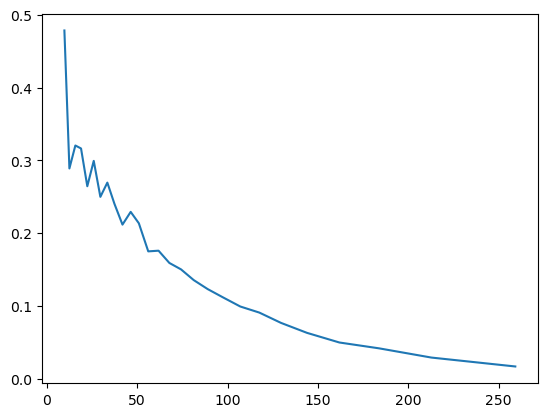

In [17]:
import matplotlib.pyplot as plt

x=ti[keys[1]]
y=[1/j for j in si[keys[1]]]
plt.plot(x,y)

In [18]:
sigma_ti={}
for item in ti:
    sigma_ti[item]= np.full(len(ti[item]), 0.3)

In [19]:
sigma_si={}
for item in si:
    sigma_si[item]=[]
    for j in si[item]:
        sigma_si[item].append(float(f"{0.6/(j**2):.2g}")) 
        

In [20]:
import os 
output_dir = "/home/master/Desktop/PHYS442-experiments/Radioactive-Decay/data"  
os.makedirs(output_dir, exist_ok=True) 
for key in keys:
    file_path = os.path.join(output_dir, f"{key}.txt")
    with open(file_path, 'w') as file:
        # Write the array to the file
        file.write('\n'.join(f"{x:.3g}\t{1/y:.3g}\t{sx:.2g}\t{sy:.2g}" for x, y, sx, sy in zip(ti[key], si[key],sigma_ti[key],sigma_si[key])))

In [21]:
def compute_weighted_mean(filename):
    data = np.loadtxt(filename, usecols=(1, 2), skiprows=1)
    
    lambda_values = data[:, 0]  # Second column (lambda values)
    uncertainties = data[:, 1]  # Third column (uncertainties)
    weights = 1 / uncertainties**2
    weighted_mean = np.sum(weights * lambda_values) / np.sum(weights)

    weighted_uncertainty = np.sqrt(1/np.sum(weights))
    
    return weighted_mean, weighted_uncertainty

filename = "/home/master/Desktop/PHYS442-experiments/Radioactive-Decay/results/fit_results.txt" 
mean, uncertainty = compute_weighted_mean(filename)
print(f"Weighted Mean: {mean:} ± {uncertainty:}")

Weighted Mean: 0.01053424388690205 ± 2.4249187792030107e-05


In [22]:
half_life=(f"{np.log(2)/mean:.3g}") 
error=(f"{uncertainty/mean**2:.1g}")
print(f"half life: {half_life}+-{error}s")

half life: 65.8+-0.2s


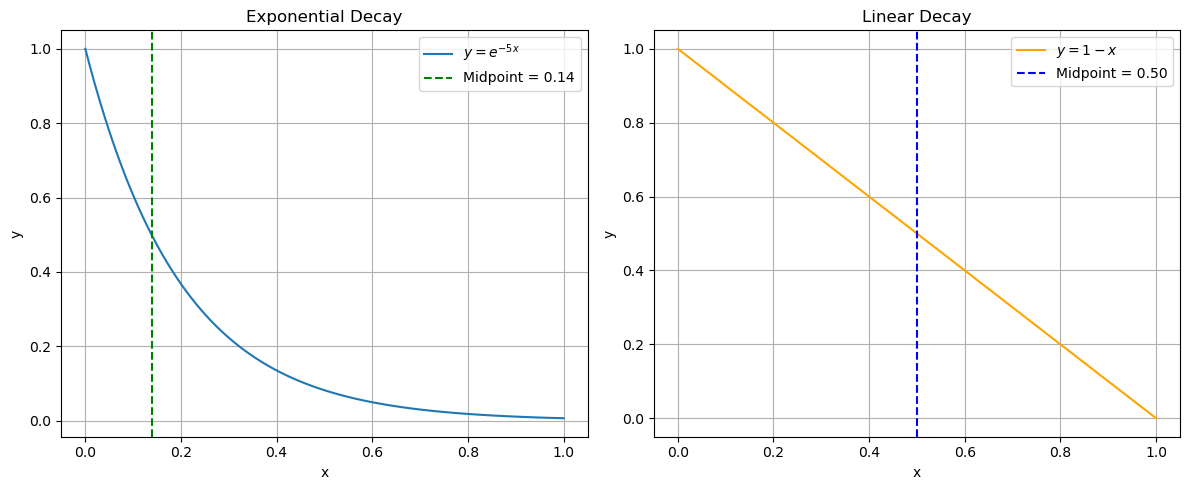

In [23]:
#code used for plots in the conclusion 

def exp_decay(x):
    return np.exp(-5*x)
def linear_decrease(x):
    return  1-x
x = np.linspace(0, 1, 100)
y_exp = exp_decay(x)
y_lin = linear_decrease(x)
x_median_exp = np.log(2)/5
x_median_lin = (x[0] + x[-1]) / 2

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(x, y_exp, label='$y = e^{-5x}$')
axes[0].axvline(x_median_exp, color='green', linestyle='--', label=f'Midpoint = {x_median_exp:.2f}')
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].set_title("Exponential Decay")
axes[0].legend()
axes[0].grid()

axes[1].plot(x, y_lin, label='$y = 1 - x$', color='orange')
axes[1].axvline(x_median_lin, color='blue', linestyle='--', label=f'Midpoint = {x_median_lin:.2f}')
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].set_title("Linear Decay")
axes[1].legend()
axes[1].grid()
plt.tight_layout()
plt.show()